# IS-445-FINAL-Presentation

# Group L
+ Guangyuan Liu
+ Dezhou Chen
+ Saurav Rathod
+ Daksh Shah

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ipywidgets
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [40]:
# Load data 
tennis_df = pd.read_csv("ATP.csv",  
                        dtype=str)
df = tennis_df

# TENNIS DATASET (2000-2020)

In [41]:
tennis_df

,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,...,winner_age,winner_entry,winner_hand,winner_ht,winner_id,winner_ioc,winner_name,winner_rank,winner_rank_points,winner_seed
0,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,R,NaN,110023,AUS,Richard Coulthard,NaN,NaN,NaN
1,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.5208761123,NaN,R,NaN,109803,AUS,John Brown,NaN,NaN,NaN
2,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2162902122,NaN,R,NaN,100257,AUS,Ross Case,NaN,NaN,NaN
3,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.264202600999997,NaN,R,NaN,100105,AUS,Allan Stone,NaN,NaN,5.0
4,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.8617385352,NaN,R,NaN,109966,AUS,Warren Jacques,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169685,3,NaN,54.0,43.0,16.0,15.0,13.0,5.0,3.0,1.0,...,22.74,NaN,R,NaN,106426,CHI,Christian Garin,92.0,620.0,NaN
169686,3,NaN,23.0,12.0,5.0,7.0,0.0,8.0,3.0,2.0,...,20.18,NaN,R,NaN,134770,NOR,Casper Ruud,108.0,527.0,NaN
169687,3,NaN,56.0,39.0,13.0,12.0,5.0,5.0,3.0,1.0,...,28.78,NaN,L,185.0,105550,ARG,Guido Pella,48.0,975.0,3.0
169688,3,NaN,34.0,24.0,11.0,10.0,5.0,6.0,3.0,0.0,...,22.74,NaN,R,NaN,106426,CHI,Christian Garin,92.0,620.0,NaN


In [42]:
# Create new columns storing year and year/month attributes
df['tourney_yearmonth'] = df.tourney_date.astype(str).str[:6]
df['tourney_year'] = df.tourney_date.astype(str).str[:4]
df['tourney_year'] = df['tourney_year'].astype(int)

In [43]:
winners = df['winner_name'].value_counts()
losers = df['loser_name'].value_counts()

winners_df = pd.DataFrame(df['winner_name'].value_counts())
winners_df['name'] = winners_df.index
winners_df['win_count'] = winners_df['winner_name']
winners_df.drop(['winner_name'], axis = 1, inplace = True)
winners_df.reset_index(inplace = True, drop = True)

In [44]:
losers_list = winners_df['name'].to_list()
#losers_list
losers = losers.reindex(losers_list, axis = 0)

In [45]:
winners_df['lost_count'] = losers.values

In [46]:
winners_df['total'] = winners_df['win_count'] + winners_df['lost_count']

In [47]:
new_df = winners_df.iloc[0:10]

DAKSH SHAH

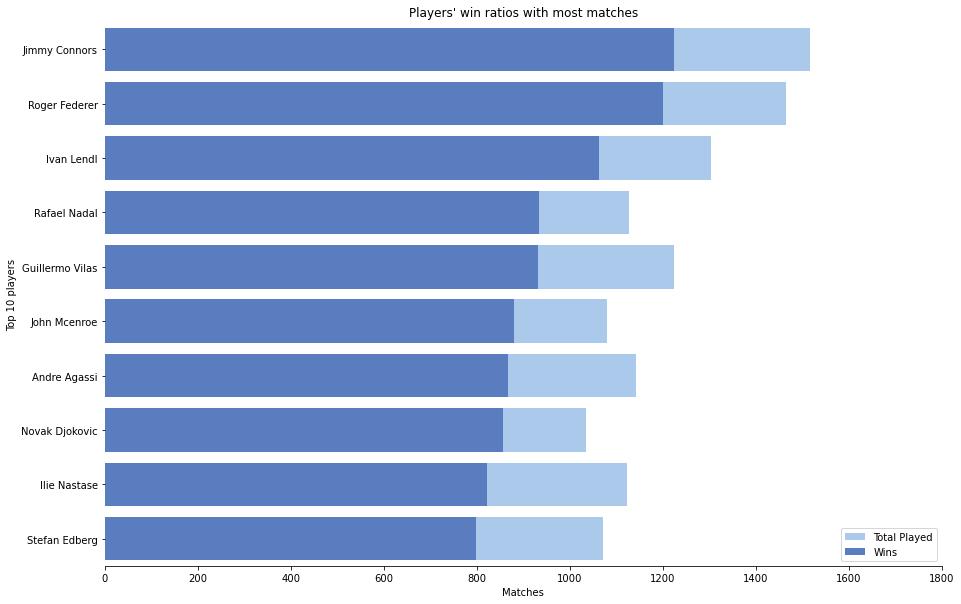

In [48]:
f, ax = plt.subplots(figsize=(15, 10))
sns.set_color_codes("pastel")
sns.barplot(x="total", y="name", data=new_df, label="Total Played", color="b")
sns.set_color_codes("muted")
sns.barplot(x="win_count", y="name", data=new_df, label="Wins", color="b")
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0, 1800), ylabel="Top 10 players",
       xlabel="Matches", title="Players' win ratios with most matches")
sns.despine(left=True, bottom=False)

In [49]:
@ipywidgets.interact(surface = ['Hard', 'Grass', 'Clay', 'Carpet'])

def position(surface):
    ret_df = df[df['score'].str.contains("RET")==True][['tourney_year','tourney_level','surface','tourney_id','winner_name']]
    ref_df_f = ret_df.groupby(['tourney_year','surface'], as_index=False).agg('count')
    
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111)
    plt.style.use('seaborn-colorblind')
    
    plt.title('Retirements - Evolution of Retirements by Surface')
    plt.ylabel('Number of Retirements')
    plt.xlabel('Year')
    
    plt.plot(ref_df_f[ref_df_f['surface']==surface]['tourney_year'], ref_df_f[ref_df_f['surface']==surface]['tourney_id'], linestyle='solid', linewidth=2)

interactive(children=(Dropdown(description='surface', options=('Hard', 'Grass', 'Clay', 'Carpet'), value='Hard…

In [50]:
fserves = df['w_1stIn'].value_counts()

In [51]:
fserves_list = winners_df['name'].to_list()
fserves = fserves.reindex(fserves_list, axis = 0)

In [52]:
winner_hands= pd.DataFrame(df.winner_hand.value_counts())

In [53]:
loser_hands= pd.DataFrame(df.loser_hand.value_counts())

In [54]:
x= winner_hands + loser_hands

In [55]:
df_xyz= winner_hands.copy()

In [56]:
df_xyz['new'] = loser_hands['loser_hand']

In [57]:
hands= pd.concat([winner_hands,loser_hands], axis = 1)

In [58]:
hands['total_matches_played']= hands['winner_hand']+ hands['loser_hand']

In [59]:
temp  = df[['winner_name', 'winner_hand']].drop_duplicates('winner_name')

SAURAV RATHOD

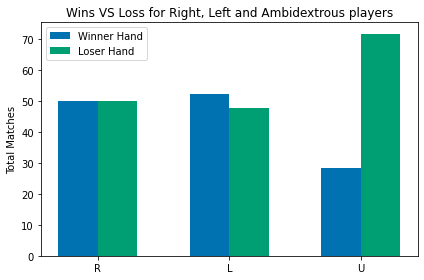

In [60]:
x = np.arange(len(hands.index)) 
width = 0.30 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, (hands['winner_hand']/hands['total_matches_played'])*100, width, label='Winner Hand')
rects2 = ax.bar(x + width/2, (hands['loser_hand']/hands['total_matches_played'])*100, width, label='Loser Hand')

ax.set_ylabel('Total Matches')
ax.set_title('Wins VS Loss for Right, Left and Ambidextrous players')
ax.set_xticks(x)
ax.set_xticklabels(hands.index)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [61]:
temp  = df[['winner_name', 'winner_hand']].drop_duplicates('winner_name')

In [62]:
no_winners_hand = df['winner_hand'].value_counts()
no_losers_hand = df['loser_hand'].value_counts() 

In [63]:
df["winner_name_bool"] = df.winner_name.isin(['Rafael Nadal','Roger Federer','Novak Djokovic'])
fav_players_winner = df[(df["winner_name_bool"]==True)]

df["loser_name_bool"] = df.loser_name.isin(['Rafael Nadal','Roger Federer', 'Novak Djokovic'])
fav_players_loser = df[(df["loser_name_bool"]==True)]

In [64]:
winner_xyz= fav_players_winner[["winner_name","w_1stIn","tourney_year"]]['winner_name'].groupby(fav_players_winner['tourney_year']).value_counts()

In [65]:
winner_xyz = winner_xyz[~winner_xyz.index.get_level_values(0).isin([1998, 1999])]

In [66]:
df_winner = pd.DataFrame()
df_winner['Winner_Tourney_Year'] = winner_xyz.index.get_level_values(0)
df_winner['Winner_Player_Name'] = winner_xyz.index.get_level_values(1)
df_winner['Win_Serve_Count'] = winner_xyz.values
df_winner = df_winner[~df_winner['Winner_Tourney_Year'].isin([1998,1999])]
df_winner.reset_index(inplace = True, drop = True)

In [67]:
loser_xyz= fav_players_loser[["loser_name","l_1stIn","tourney_year"]]['loser_name'].groupby(fav_players_loser['tourney_year']).value_counts()

In [68]:
df_loser = pd.DataFrame()
df_loser['Loser_Tourney_Year'] = loser_xyz.index.get_level_values(0)
df_loser['Loser_Player_Name'] = loser_xyz.index.get_level_values(1)
df_loser['Loss_Serve_Count'] = loser_xyz.values
df_loser = df_loser[~df_loser['Loser_Tourney_Year'].isin([1998,1999])]
df_loser.reset_index(inplace = True, drop = True)

In [69]:
merged_df = pd.concat([df_winner, df_loser],axis=1)

In [70]:
new_df = pd.merge(df_winner, df_loser,  how='left', left_on=['Winner_Tourney_Year','Winner_Player_Name'], right_on = ['Loser_Tourney_Year','Loser_Player_Name'])

In [71]:
new_df['Win_Percentage']= (new_df['Win_Serve_Count']/(new_df['Loss_Serve_Count']+new_df['Win_Serve_Count']))*100
new_df['Loss_Percentage']= 100.00- new_df['Win_Percentage']

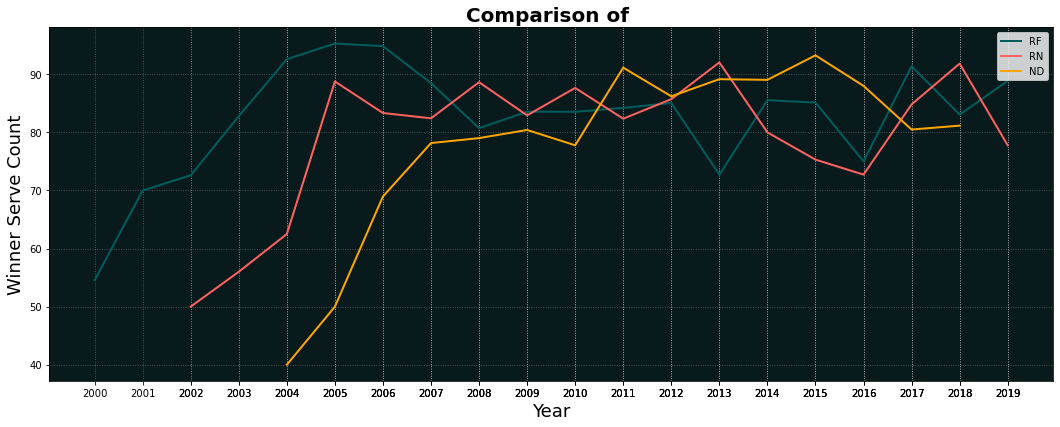

In [72]:
fig, ax = plt.subplots(figsize = (18,6.5))
ax.plot(new_df['Winner_Tourney_Year'][new_df['Winner_Player_Name'] == 'Roger Federer'], new_df['Win_Percentage'][new_df['Winner_Player_Name'] == 'Roger Federer'], label = 'RF', color= '#005d5d', linewidth= 2) 
ax.plot(new_df['Winner_Tourney_Year'][new_df['Winner_Player_Name'] == 'Rafael Nadal'], new_df['Win_Percentage'][new_df['Winner_Player_Name'] == 'Rafael Nadal'], label = 'RN', color= '#ff6361', linewidth= 2) 
ax.plot(new_df['Winner_Tourney_Year'][new_df['Winner_Player_Name'] == 'Novak Djokovic'], new_df['Win_Percentage'][new_df['Winner_Player_Name'] == 'Novak Djokovic'], label = 'ND', color= '#ffa600', linewidth= 2) 

ax.set_xticks(new_df['Winner_Tourney_Year'])

plt.title('Comparison of ', fontsize=20, fontweight='bold')

ax.set_facecolor('#081a1c') 

ax.grid(b = False, color ='white',
        linestyle ='dotted', linewidth = 0.9,
        alpha = 0.3, zorder = 1)

    
ax.set_ylabel('Winner Serve Count', fontsize= 18)
ax.set_xlabel('Year', fontsize= 18)

ax.legend()


In [73]:
# Convert numerical values to float
numeric_columns = ['w_ace', 'l_ace', 'w_df', 'l_df', 'w_bpSaved', 'l_bpSaved', 'winner_rank', 'loser_rank', 'winner_age', 'loser_age', 'winner_ht', 'loser_ht', 'w_svpt', 'l_svpt', 'minutes']
tennis_df[numeric_columns] = tennis_df[numeric_columns].astype(float)

In [74]:
# Create new columns storing year and year/month attributes
tennis_df['tourney_yearmonth'] = tennis_df.tourney_date.astype(str).str[:6]
tennis_df['tourney_year'] = tennis_df.tourney_date.astype(str).str[:4]
tennis_df['tourney_year'] = tennis_df['tourney_year'].astype(int)

DEZHOU CHEN

In [75]:
@ipywidgets.interact(country = ['ARG','ESP','SUI','USA','SRB'])

def position(country):
    s = tennis_df[(tennis_df['tourney_level'] == 'G') & (tennis_df['winner_ioc'].isin([country]))].groupby(['tourney_year','winner_ioc']).agg('count')
    plt.plot(s['tourney_id'].index.get_level_values(0), s['tourney_id'].values, color='blue', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=2, label='Argentina')



interactive(children=(Dropdown(description='country', options=('ARG', 'ESP', 'SUI', 'USA', 'SRB'), value='ARG'…

GUANGYUAN LIU

In [76]:
@ipywidgets.interact(dimensions = ['winner_rank','loser_rank','winner_age','loser_age','winner_ht','loser_ht','w_svpt','l_svpt'])


def position(dimensions):
    tennis_df[dimensions].plot(kind='hist',title = dimensions,figsize=(15,5), stacked=True)



interactive(children=(Dropdown(description='dimensions', options=('winner_rank', 'loser_rank', 'winner_age', '…